In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%load_ext autotime

train = pd.read_csv("./res/house-prices-advanced-regression-techniques/train.csv")
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


time: 235 ms


In [2]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

time: 31 ms


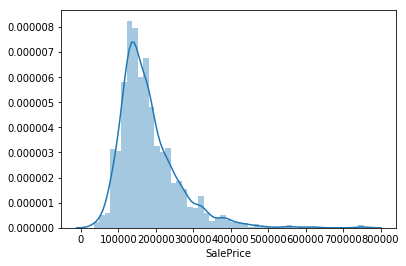

time: 516 ms


In [3]:
sns.distplot(train["SalePrice"])

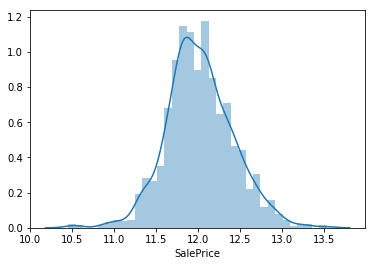

time: 360 ms


In [4]:
log_sale_price = np.log1p(train["SalePrice"])
sns.distplot(log_sale_price)

In [5]:
train["SalePrice"] = log_sale_price

# 널 많은 컬럼 삭제
drop_cols = ["Id", "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
train.drop(columns=drop_cols, axis=1, inplace=True)

#정수형 데이터 평균 값 대치
train.fillna(train.mean(), inplace=True)

#정수형 이외 널이 존재하는 칼람 추출
#train.isnull().sum() 결과에서 0보다 큰 항들의 인덱스 추출
null_column = train.isnull().sum()[train.isnull().sum() > 0]

print(train.dtypes[null_column.index])

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object
time: 188 ms


In [6]:
#문자열 속성 가변수로 카테고리화
#get_dummies는 컬럼 미지정시 문자열 속성들을 변환 수행
print("before get dummies train.shape : {}".format(train.shape))
train = pd.get_dummies(train)
print("after get dummies train.shape : {}".format(train.shape))
null_column = train.isnull().sum()[train.isnull().sum() > 0]

print(train.dtypes[null_column.index])

before get dummies train.shape : (1460, 75)
after get dummies train.shape : (1460, 271)
Series([], dtype: object)
time: 172 ms


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def get_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("#### model : {0} ####\n MSE : {1:.3f}\n RMSE : {2:.3f}\n".format(model.__class__.__name__, mse, rmse))
    return rmse

def get_rmses(models, X_test, y_test):
    
    rmses = []
    for model in models:
        rmse = get_rmse(model, X_test, y_test)
        rmses.append(rmse)
    
    return rmses

y = train["SalePrice"]
X = train.drop(columns=["SalePrice"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)

#### model : LinearRegression ####
 MSE : 0.014
 RMSE : 0.117

#### model : Ridge ####
 MSE : 0.014
 RMSE : 0.120

#### model : Lasso ####
 MSE : 0.027
 RMSE : 0.165



[0.11717630950677019, 0.11952792518345369, 0.16506711818899414]

time: 94 ms


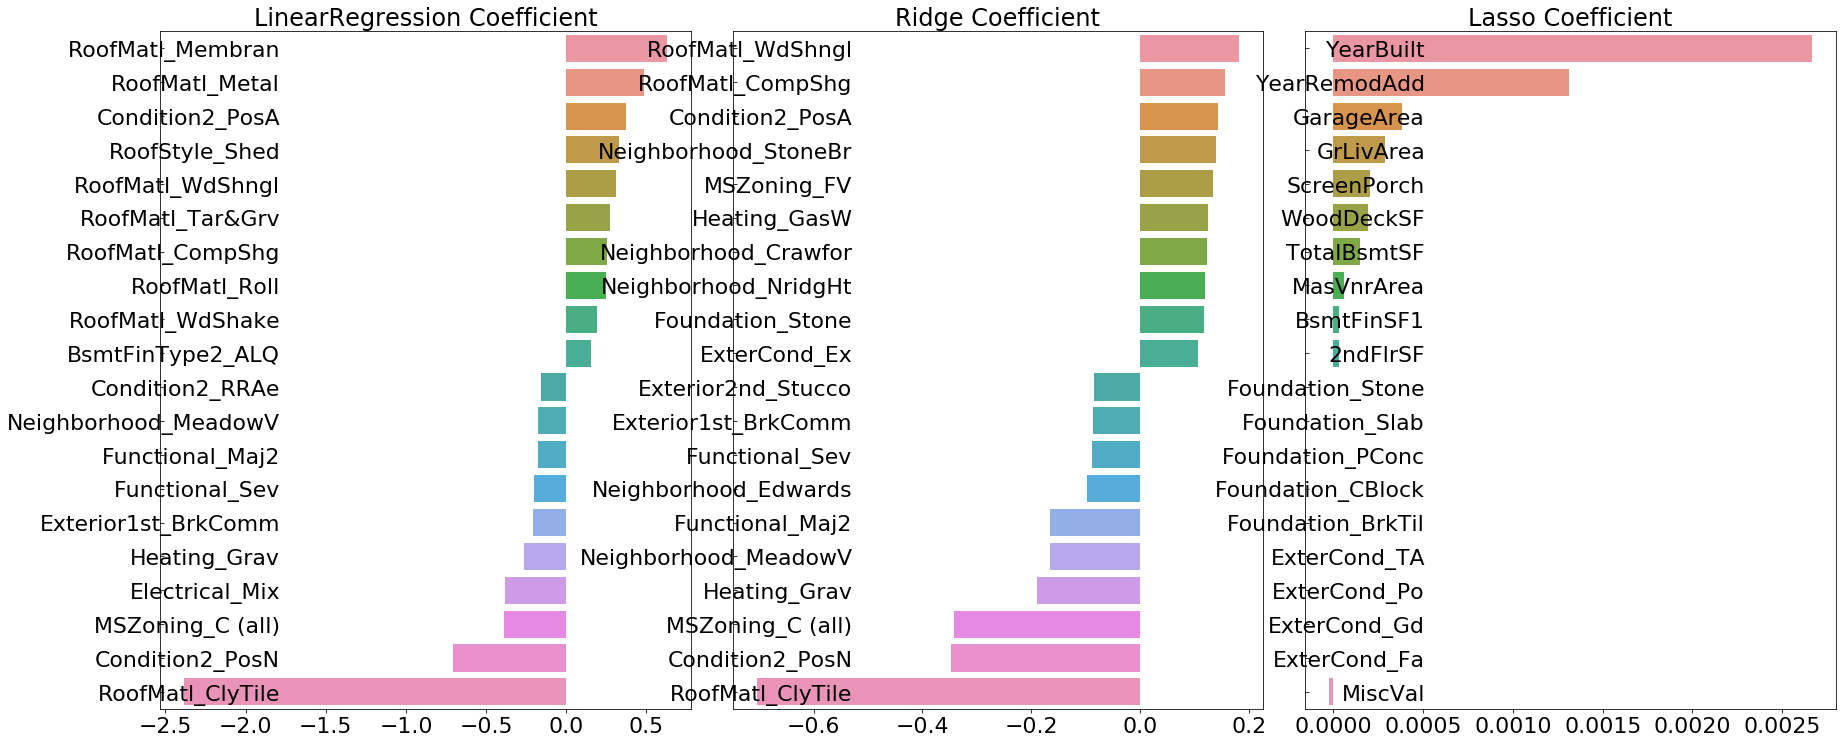

time: 2.09 s


In [21]:
def get_top_bottom_coef(model, X, n=10):
    coef = pd.Series(data=model.coef_, index=X.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

def visualize_coeff(models, X, n=10):
    fig, axs = plt.subplots(figsize=(24, 10), ncols=3, nrows=1)
    fig.tight_layout()
    
    for idx, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model, X, n=10)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[idx].set_title(model.__class__.__name__+" Coefficient", size=24)
        axs[idx].tick_params(axis="y", direction="in", pad=-120)
        for label in (axs[idx].get_xticklabels() + axs[idx].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[idx])

visualize_coeff(models, X, n=10)

In [25]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params, X, y):
    
    gs = GridSearchCV(model, param_grid=params, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")
    gs.fit(X, y)
    rmse = np.sqrt(-1 * gs.best_score_)
    print("### {0} ###\n mean RMSE : {1:.3f}\n best alpha : {2}\n".format(model.__class__.__name__, np.mean(rmse), gs.best_params_))
    

params = {
    "alpha" : [0.001, 0.05, 0.1, 1, 5, 8, 10, 15, 20]
}

print_best_params(ridge,params, X, y)
print_best_params(lasso,params, X, y)

### Ridge ###
 mean RMSE : 0.142
 best alpha : {'alpha': 10}

### Lasso ###
 mean RMSE : 0.142
 best alpha : {'alpha': 0.001}

time: 3.94 s


#### model : LinearRegression ####
 MSE : 0.014
 RMSE : 0.117

#### model : Ridge ####
 MSE : 0.012
 RMSE : 0.111

#### model : Lasso ####
 MSE : 0.012
 RMSE : 0.108



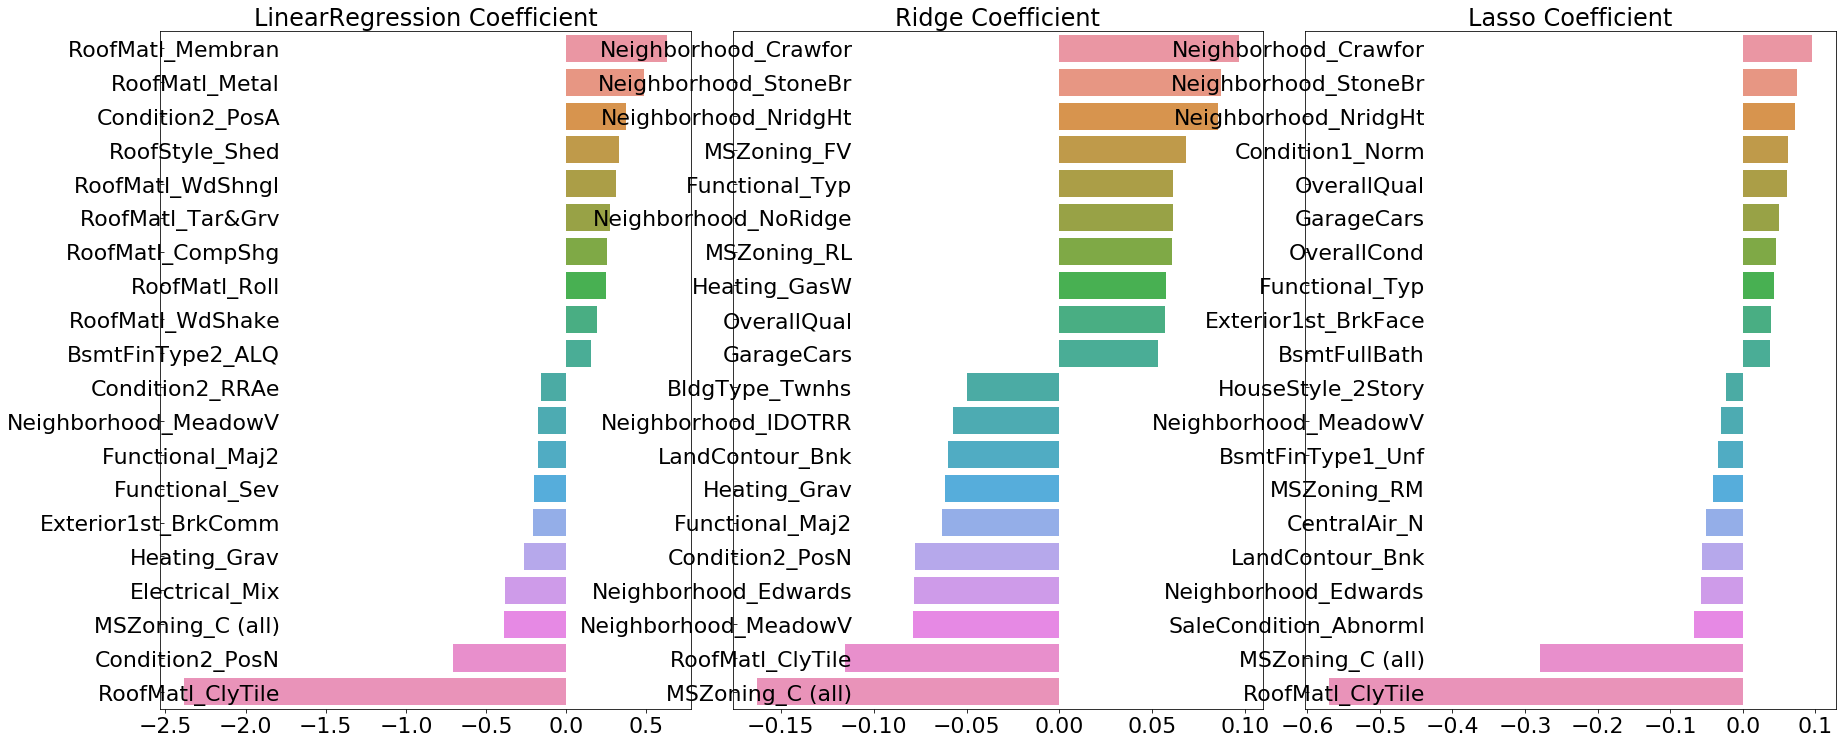

time: 2.53 s


In [26]:
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.001)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)
visualize_coeff(models, X, n=10)